# Shooting Method for Finite Potential Well

In class we discovered that there are no analitic solutions for either the Eigenenergies, or Eigenfunctions for a partical in a finite square well.  At best, we have to solve a transcendental equation for the Eigenenergies, and then work backward to find the normalized (piecewise) Eigenfunctions.

This worksheet is designed to step you through the process of numerically determining both the Eigenenergies and the values (probabilities amplitudes) of the Eigenfunctions using the Shooting Method.  

## Some basic tools first

The shooting method is composed of two powerful algorithms that are used in tandem.  
- Newton-Raphson zero finding
- Runge-Kutta Integration

Lets explore how we can use these in a basic example first.

In [ ]:
#lets first import our usual packages

import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

#the next line makes graphs look better on HD monitors, you can delete it if you want
%config InlineBackend.figure_format='retina'  

### Newton-Raphson Zero Finding

Newton's method is an interative process that takes an initial (seed) guess for a zero of a function, and then iterates on that seed until you converge on a solution.

Specifically it solves problems of the form $f(x)=0$ here it finds ONE value of x that makes the function equal to zero.  If more than one zero of the function exsists, then the zero Newton's method finds is determined by the initial seed value.  The dependence between seed value and the zero the methods finds can be complicated.

Given seen value $x_n$, then an approximation of the zero of can be determined by:

$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$

To implement this in python we need to import the library, define the function, the call the method.

In [ ]:
from scipy.optimize import newton

In [ ]:
def f(x):
    return x**2 - 4

#notice method "newton" takes two arguments.  The first is the function we are 
#finding the root of, the second is the random seed value.

root = newton(f, 4)  
print('x = ',root)

x =  2.0000000000000004


- Play with the seed value to see if you can find the second zero of $f(x)$

### Runge-Kutta

The [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) method is an extramly useful numeric method for appoximating a differential equation.  In class we discussed its connection to the [Forward Euler](https://en.wikipedia.org/wiki/Euler_method) method you learned in BC.  

To implement it in python we need to import the library, define the differential equation and the mesh we want to solve the differential equal on, then call the method.

The Runge-Kutta method is hiden inside a more expansive method called _odeint_ which defaults to RK45, but can also implement other Differential Equation solves if passed as a parameter.  You can read more about [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) here.

In [ ]:
from scipy.integrate import odeint

In [ ]:
# This method defines the differential equation
# As input parameters it takes in a dependent variable (t), and a y value.
# Notice it also has an arbitary step function that changes the value of one
# of the constants at a t=0 from u=0 to u=2.  

def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

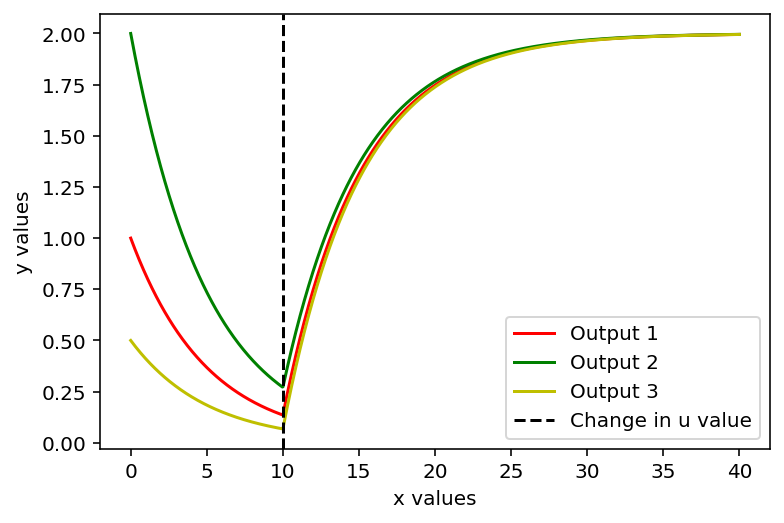

In [ ]:
# set mesh of independent variable
x = np.linspace(0,40,1000)

# solve ODE three times with three different initial conditions y={1,2,0.5}
y1 = odeint(model,1,x)
y2 = odeint(model,2,x)
y3 = odeint(model,0.5,x)

# plot results
plt.plot(x,y1,'r-',label='Output 1')
plt.plot(x,y2,'g-',label='Output 2')
plt.plot(x,y3,'y-',label='Output 3')
plt.axvline(x=10,color='k',linestyle='--',label='Change in u value')
plt.ylabel('y values')
plt.xlabel('x values')
plt.legend(loc='best');

## Combine Newton and RK45 to make the Shooting Algorithm

The Shooting Method approximates the boundry value problem for a given differential equation.  You set the initial value, then use the shooting method to paramaterize the differential equation in order to fit a final boundry condition.  

To implement the shooting method we first have to define a method that defines a "function" of the ODE that takes the input of the initial value (and any other parameters) and returns the final value (at the other boundry).  Then we can use this method as input into Newton's method.  

After finding the winning initial value, we can plot the full solution and print the initial and final values to confirm the solution.

In [ ]:
# This method defines the function takeshot that returns the last value of the ODE
# after its evaluated with odeint.  We need a boundry condition for this function
# so I'm going to somewhat arbitarily pick 1.75

def takeshot(Init):
                   
    x=np.linspace(0,20,300)                #make mesh to int over. stop at boundry
    SOL=odeint(model,Init,x)
    #plt.plot(x,SOL)
    return 1.75-SOL[-1]                    #return the last value of ODE minus 1.75

Winner Initial Value = [1.12857351]
last value of ODE =  [1.75]


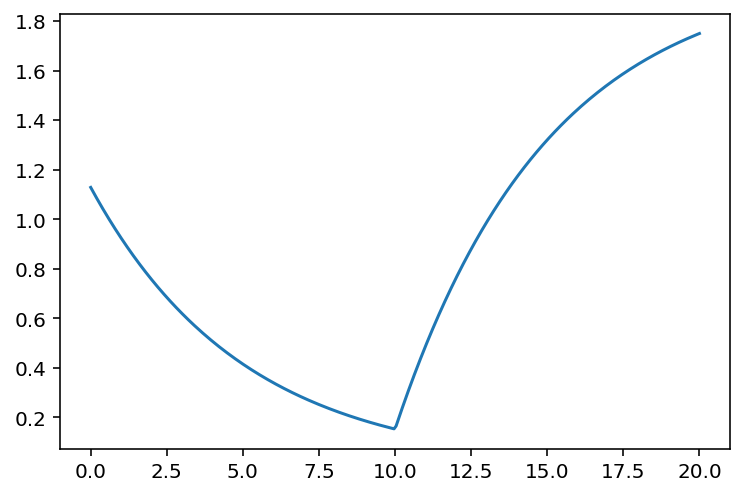

In [ ]:
x=np.linspace(0,20,300)

initial_guess = 2
Winner=newton(takeshot,initial_guess)
print('Winner Initial Value =', Winner)
SOL=odeint(model,Winner,x)
plt.plot(x, SOL)
print('last value of ODE = ',SOL[-1])

- Are there any other initial conditions that meet the boundry conditions? Play with the initial guess value to see if you can find any other initial conditions that meet the final boundry condition.

Its also instructive to look at the spectrum of initial conditions and errors between the desired boundry condition (target) and the last value of odeint.  We can do this by choosing a spectrum of initial conditions and then save and plot the final values.

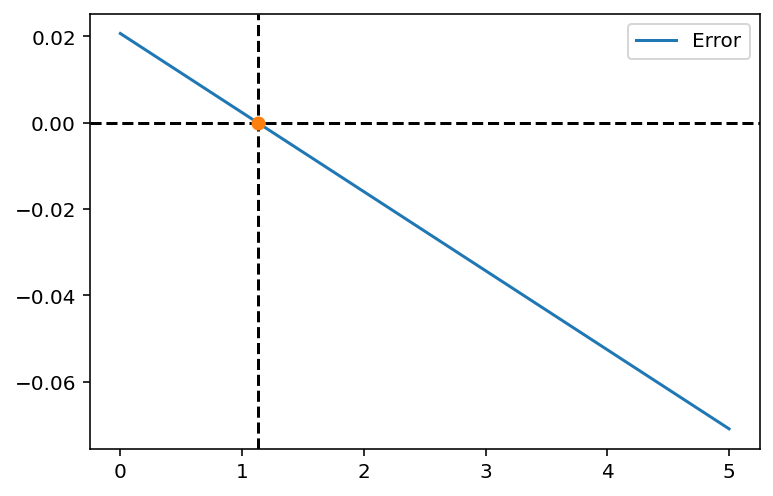

In [ ]:
I=np.linspace(0,5,100)    #make an array of all posible initial conditions
Error=[]

for i in I:
    Error.append(takeshot(i))

#plot the error between target boundry condition and last value of odeint
plt.plot(I,Error,label='Error') 
plt.axvline(x=Winner,color='k',linestyle='--')
plt.axhline(y=0,color='k',linestyle='--')
plt.legend(loc='best');

#plot the winning initial condition and show error = 0
plt.plot(Winner,takeshot(Winner),'o');

# Your Turn
We know that the differential equation for a quantum particle trapped in a potential well is:

$\frac{d^2}{dx^2}\phi_E(x)=-\frac{2m}{\hbar^2}\left[E-U(x)\right]\phi_E(x)$

Because this is a second order differential equation we need to not just set one initial value for odeint, we need to establish a state vector that has both the initial value and the initial derivative.

Use state vector $S=[\phi(x),\frac{d}{dx}\phi(x)]$


We can establish a centered square well with walls at +L and -L.

In [ ]:
L=1                   #well has width of 2*L
Uo = 20               #set finite well height.  Assumption is that floor of well is at U=0
InitVal=[-2.5*L,0]    #set starting location for shot, left of well wall to show exponential
x=np.linspace(-2.5*L,2.5*L,300)

Now we need to define the Hamiltonian Differential equation. Notice we are again using 
$\hbar = 1$ and $m_e = 1$

In [ ]:
#ODE definition that takes in State vector S, postion x, 
# and supected eigenEnergy E, width of well L and height of Well Uo
def HamiltonianODE(S,x,E,L,Uo):

    #set parameters for square well
    hb2=1
    me=1
   
    #use if statements to define square well potentials
    if x <= -L:
        U = Uo
    elif (x>-L) and (x<L):
        U = 0  
    else:
        U = Uo  
    #return a vector based on our definition of the ODE
    return [S[1],-(2*me/hb2)*(E-U)*S[0]]

In the code block below, define a new "takeshot" method that makes use of the HamiltonianODE method above.

In [ ]:
def func(E):
    model = lambda S,x : HamiltonianODE(S, x, E, L, Uo)  # S contains starting value and 1st derivative at x[0] (both are required for 2nd order ODE)
    SOL=odeint(model, InitVal,x)
    return SOL[:, 0]

#
def takeshot(E):
    SOL = func(E)
    return np.absolute(SOL[-1])


In the code block below, define an Eigenenergy spectrum from $0 < E < U_o$ with at least 1000 steps.  Feed this spectrum into your takeshot method, then plot the last value of the output of takeshot vs. the Eigenenergy spectrum.  You may want to use a log scale on your plot.

In [ ]:
takeshot(0.9178704902326261)

1.7632752802558505

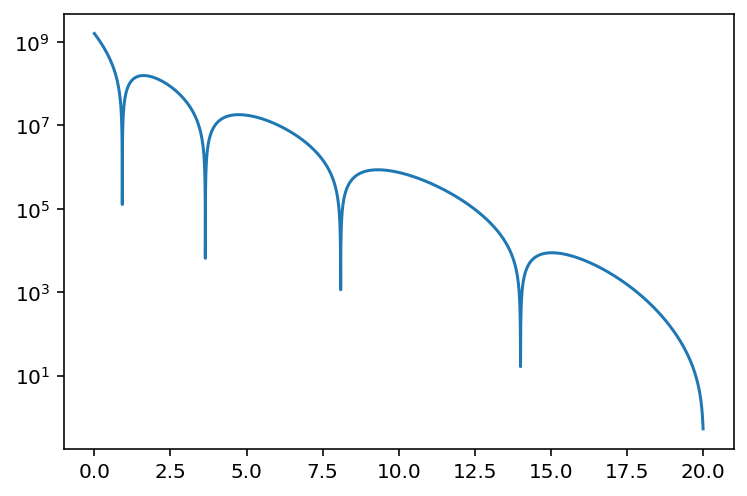

In [ ]:
#

E_spectrum = np.linspace(0, Uo, 10000)

Error=[]

for E in E_spectrum:
    Error.append(takeshot(E))

plt.plot(E_spectrum,Error,label='Error') 
plt.yscale('log')


Using good choices from the last step for initial guesses of Eigenenergy, finish the shooting method and find the first three Eigenenergies and plot the corrisponding probability distributions.  **Remember**, the output of the shooting algorithm **ISN'T NORMALIZED**  You will need normalize the wavefunction before calculating the probability distributions.

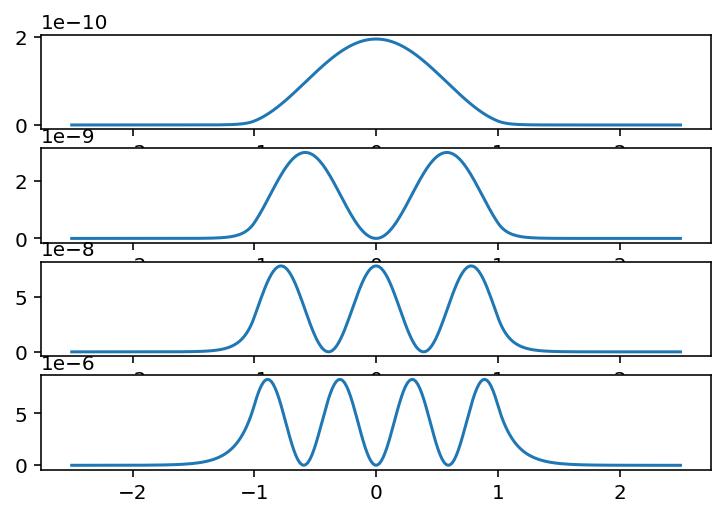

In [ ]:
#
import scipy.integrate as it

def normalized(psi):
    integral = it.simps(np.absolute(psi)**2, x)
    return psi/integral

init_E = [0.9, 3.7, 7.6, 13.2]
Winners = [newton(takeshot, val) for val in init_E]
Psis = [normalized(func(E)) for E in Winners]

fig, axes = plt.subplots(len(Psis))
for i in range(len(Psis)):
    axes[i].plot(x, np.absolute(Psis[i])**2)
    axes[i].set_label(f"Eigenenergy: {Winners[i]}")



In [ ]:
print(Winners)

[0.9178704878026155, 3.646200865381253, 8.092150527440417, 14.002160333019226]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=062842dd-94f5-4311-b2d7-8d25a1c6c4f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>